In [ ]:
# შევქმნათ მოდელი რომლის დახმარებით , 
# ვიწინასწარმეტყველებთ სახლის ფასი მისი ,  რაღაც მახასიათებლების მიხედვით

# ამავე folder ში გვაქს USA_Housing.csv რომელსაც გამოვიყენებთ.

In [2]:
#პირველ რიგში იმპორტები
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\gstore\AppData\Local\Temp\ipykernel_2584\1604718795.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
USAhousing = pd.read_csv('USA_Housing.csv')

In [4]:
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
# info საჭირო ფუნქციაა !
# გაირკვა რომ 7 colum გვაქ და 500 entries

USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
# ასევე საჭიროა describe მეთოდი
# სტატისტიკური მონაცემებისთვის
# address ვერ მივწვდებით ამ მეთოდით რადგან string ია

USAhousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [7]:
# columns რო იცოდე რა ქვია ველებს დაკოპირებაც მარტივია :)

USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [8]:
# sns.pairplot(USAhousing)
# sns.distplot(USAhousing['Price'])
# sns.heatmap(USAhousing.corr())

In [9]:
# არ ვეხებით string columns ამ შემთხვევაში address
# X --> fitures --> რას ვიყენებ პროგნოზირებისთვის

X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]

# y --> predict --> რას ვიბრუნებ საბოლოოდ
y = USAhousing['Price']

In [10]:
# ახლაააა training split ჩვენი data 
# ამაში ვიყენებთ train_test_split 

from sklearn.model_selection import train_test_split

In [11]:
# train_test_split ფუნქცია გამოიყენება data -ს დასაყოფად training and testing ებად.
# 'test_size': ზომა testing set. 40% of the data გამოიყენება testing, და დარჩენილი 60% training ისთვის.
# X_train: The training set of features.
# X_test: The testing set of features.
# y_train: The training set of target values.
# y_test: The testing set of target values.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [12]:
# LinearRegression მოდელისთვის საჭირო import

from sklearn.linear_model import LinearRegression

In [13]:
# ყველაფერი გვაქვს იმისთვის , რომ training model შევქმნათ

lm = LinearRegression()

In [14]:
# გავწვრთნათ მოდელი
# you're essentially instructing the linear regression model to learn 
# the patterns in the training data and find the best-fitting line 
# that represents the relationship between the features and the target variable

lm.fit(X_train,y_train)

LinearRegression()

In [15]:
# will give you the intercept of the linear regression model

print(lm.intercept_)

-2640159.796852963


In [16]:
# მე მივიღე თითო ველისთვის კოეფიციენტიი ! 

# When you train a linear regression model, the algorithm estimates the values of these coefficients 
# to fit the best-fitting line to your data. The lm.coef_ attribute in scikit-learn 
# returns an array containing these coefficients.

# For example, if you have features 'Avg. Area Income', 'Avg. Area House Age', etc.,
# the coefficients will indicate how much the predicted 'Price' changes for a one-unit change 
# in each of these features, assuming other features remain constant

coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an **increase of \$21.52 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an **increase of \$164883.28 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of \$122368.67 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an **increase of \$2233.80 **.
- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an **increase of \$15.15 **.


In [17]:
# Predictions

In [18]:
# The code predictions = lm.predict(X_test) is used to make predictions on the testing set (X_test) 
# using the linear regression model you've trained (lm). The result is stored in the predictions variable.

# These predicted values represent the model's estimates for the target variable 
# ('Price' in your case) based on the features in the testing set. Each element in the predictions array 
# corresponds to the predicted value for a particular instance in the testing set

predictions = lm.predict(X_test)
predictions

array([1260960.70567628,  827588.75560322, 1742421.24254349, ...,
        372191.40626905, 1365217.15140899, 1914519.54178899])

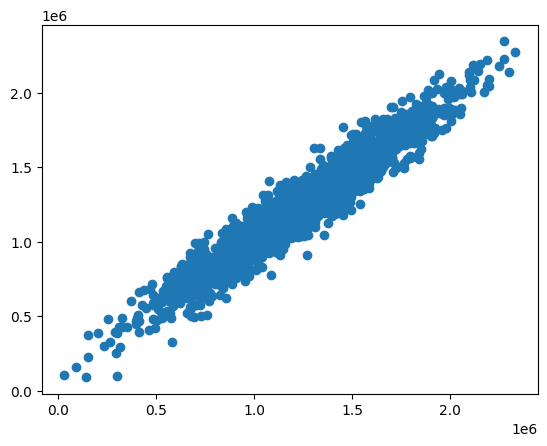

In [19]:
# წრფივი ხაზი კარგად გაივლება და აშკარაა , რომ მშვენივრად მუშაობს

plt.scatter(y_test,predictions)

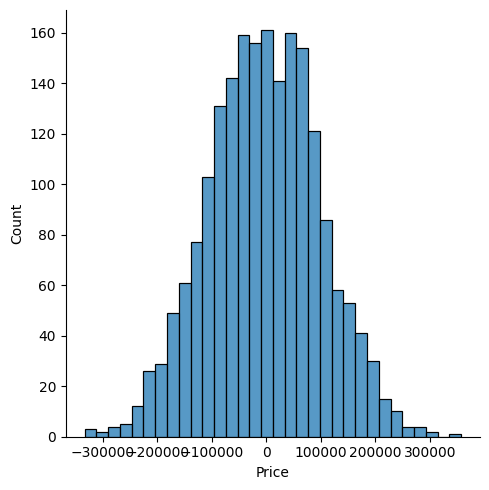

In [20]:
sns.displot((y_test-predictions))

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [21]:
from sklearn import metrics

In [22]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82288.22251914945
MSE: 10460958907.208805
RMSE: 102278.82922290813
